# **Introduction**

This project analyzes anthropometric data from the 2017–2020 National Health and Nutrition Examination Survey (NHANES). The dataset includes body measurements for adult participants, sourced from two files: nhanes_adult_male_bmx_2020.csv and nhanes_adult_female_bmx_2020.csv.
Each dataset contains seven variables: weight, height, upper arm length, upper leg length, arm circumference, hip circumference, and waist circumference.

The objective of this analysis is to compare male and female body measurements using statistical summaries, visualizations, and derived health indicators—such as Body Mass Index (BMI), waist-to-height ratio, and waist-to-hip ratio. The analysis is conducted using NumPy for computation and Matplotlib for visualization, with interpretations provided to support the findings.

## **Data Loading and Preparation**

In this section, we load the male and female NHANES datasets into the Python environment as NumPy matrices. After importing the data, we examine their structure and dimensions to ensure that the files have been read correctly and that each column corresponds to the expected body measurement variables.

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
import os

# Firstly mount the Google Drive
drive.mount('/content/drive')

# Path of our specific project folder
folder_path = "/content/drive/MyDrive/Data_Science_Capstone_Project_01"

# Create full file paths using os.path.join for safety
male_file = os.path.join(folder_path, "nhanes_adult_male_bmx_2020.csv")
female_file = os.path.join(folder_path, "nhanes_adult_female_bmx_2020.csv")

# Load body measurement data of both male and female body
male_data = np.genfromtxt(male_file, delimiter=",", skip_header=1)
female_data = np.genfromtxt(female_file, delimiter=",", skip_header=1)

# Check the shape of both the datasets
print("Male dataset shape:", male_data.shape)
print("Female dataset shape:", female_data.shape)

# Preview first 5 rows
print("\nFirst 5 rows of male data:\n", male_data[:5])
print("\nFirst 5 rows of female data:\n", female_data[:5])


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Male dataset shape: (4082, 7)
Female dataset shape: (4222, 7)

First 5 rows of male data:
 [[  nan   nan   nan   nan   nan   nan   nan]
 [ 98.8 182.3  42.   40.1  38.2 108.2 120.4]
 [ 74.3 184.2  41.1  41.   30.2  94.5  86.8]
 [103.7 185.3  47.   44.   32.  107.8 109.6]
 [ 86.  167.8  39.5  38.4  29.  106.4 108.3]]

First 5 rows of female data:
 [[  nan   nan   nan   nan   nan   nan   nan]
 [ 97.1 160.2  34.7  40.8  35.8 126.1 117.9]
 [ 91.1 152.7  33.5  33.   38.5 125.5 103.1]
 [ 73.  161.2  37.4  38.   31.8 106.2  92. ]
 [ 61.7 157.4  38.   34.7  29.  101.   90.5]]


The datasets were successfully imported into the environment. Each row represents an individual participant, and each column corresponds to a specific body measurement. The structure confirms that the data is properly loaded and ready for exploratory analysis.

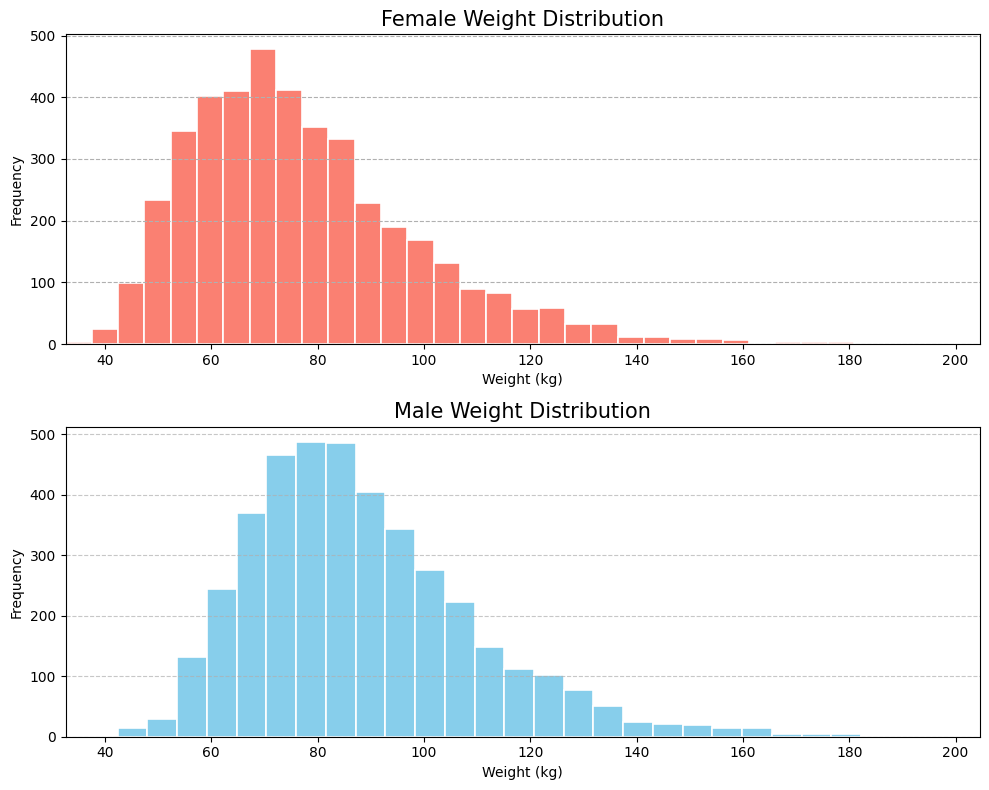

In [32]:
# Extract weight column
male_weight = male_data[:, 0]
female_weight = female_data[:, 0]

# Remove missing values
male_weight = male_weight[~np.isnan(male_weight)]
female_weight = female_weight[~np.isnan(female_weight)]

# Common x-axis limits
xmin = min(male_weight.min(), female_weight.min())
xmax = max(male_weight.max(), female_weight.max())

plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 2)
plt.hist(male_weight, bins=30, color='skyblue', edgecolor='white', linewidth=1.2)
plt.title("Male Weight Distribution", fontsize=15)
plt.xlabel("Weight (kg)")
plt.ylabel("Frequency")
plt.xlim(xmin, xmax)
plt.grid(axis='y', linestyle='--', alpha=0.7) # Added grid for y-axis

plt.subplot(2, 1, 1)
plt.hist(female_weight, bins=30, color='salmon', edgecolor='white', linewidth=1.2)
plt.title("Female Weight Distribution", fontsize=15)
plt.xlabel("Weight (kg)")
plt.ylabel("Frequency")
plt.xlim(xmin, xmax)
plt.grid(axis='y', linestyle='--', alpha=1) # Added grid for y-axis

plt.tight_layout()
plt.show()


The visual comparison shows that male participants generally have higher body weights than female participants. Both distributions display variability with slight right-skewness, indicating some heavier observations in each group.


## **Box-and-Whisker Plot Comparison of Weights**

In this section, we use a box-and-whisker plot to compare the weight distributions of male and female participants. Unlike histograms, boxplots clearly show the median, spread, and potential outliers, making comparison more precise.

/tmp/ipython-input-25662682.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([female_weight, male_weight],


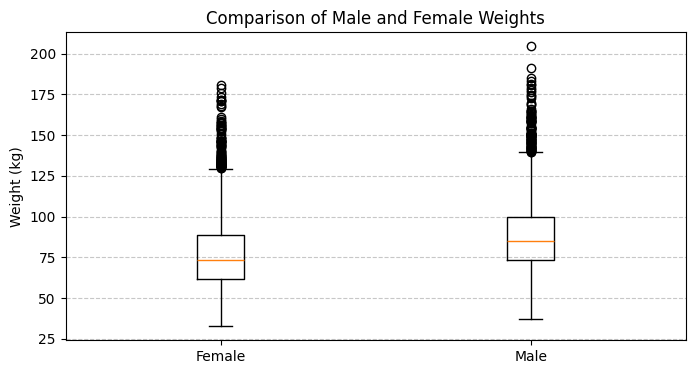

In [33]:
plt.figure(figsize=(8,4))

plt.boxplot([female_weight, male_weight],
            labels=["Female", "Male"])

plt.title("Comparison of Male and Female Weights")
plt.ylabel("Weight (kg)")

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



The boxplot provides a clearer comparison of weight distributions between males and females. The median weight of males is visibly higher than that of females. Additionally, the male group shows a wider interquartile range, indicating greater variability in body weight. Outliers may also be observed, representing individuals with unusually high or low weights.

## **Statistical Summary of Weight**

In this section, we compute key statistical measures for male and female weights. These measures help us quantify central tendency, dispersion, and distribution shape.

We will calculate:

-> Mean

-> Median

-> Standard Deviation

-> Variance

In [34]:
# Male weight statistics
male_mean = np.mean(male_weight)
male_median = np.median(male_weight)
male_std = np.std(male_weight)
male_var = np.var(male_weight)

# Female weight statistics
female_mean = np.mean(female_weight)
female_median = np.median(female_weight)
female_std = np.std(female_weight)
female_var = np.var(female_weight)

print("\nMale Weight Statistics")
print("Mean:", round(male_mean, 2))
print("Median:", round(male_median, 2))
print("Standard Deviation:", round(male_std, 2))
print("Variance:", round(male_var, 2))


# Print results
print("\nFemale Weight Statistics")
print("Mean:", round(female_mean, 2))
print("Median:", round(female_median, 2))
print("Standard Deviation:", round(female_std, 2))
print("Variance:", round(female_var, 2))




Male Weight Statistics
Mean: 88.36
Median: 85.0
Standard Deviation: 21.42
Variance: 458.77

Female Weight Statistics
Mean: 77.4
Median: 73.6
Standard Deviation: 21.54
Variance: 464.08


The statistical summary confirms that males have a higher average and median weight compared to females. The standard deviation and variance are also higher for males, indicating greater dispersion in male body weight. The close proximity between mean and median suggests that both distributions are approximately symmetric, although slight skewness may still be present.

## **Calculation and Addition of Body Mass Index (BMI)**

In this section, we compute the Body Mass Index (BMI) for female participants and add it as a new column to the female dataset.

BMI is calculated as:

### **BMI = Weight (kg) / (Height(m))^2**

Since height is given in centimeters, we first convert it into meters before computing BMI.

In [35]:
# Extract female weight and height
female_weight = female_data[:, 0]
female_height_cm = female_data[:, 1]

# Remove rows with missing weight or height
valid_mask = ~np.isnan(female_weight) & ~np.isnan(female_height_cm)

female_clean = female_data[valid_mask]

# Re-extract clean values
female_weight = female_clean[:, 0]
female_height_m = female_clean[:, 1] / 100  # convert cm to meters

# Calculate BMI
female_bmi = female_weight / (female_height_m ** 2)

# Add BMI as new column
female_with_bmi = np.column_stack((female_clean, female_bmi))

# Check new shape
print("New female dataset shape:", female_with_bmi.shape)


New female dataset shape: (4221, 8)


BMI was calculated for all female participants using weight and height measurements. The height values were converted from centimeters to meters before computation. The BMI values were successfully appended as an additional column to the dataset, expanding it from seven to eight variables. This new variable will allow for further analysis of body composition and health-related patterns.

## **Standardization of Female Body Measurements (Z-Scores)**

In this section, we standardize all variables in the updated female dataset (including BMI). Standardization converts each column into z-scores, allowing variables measured on different scales to be compared fairly.

The z-score formula is:

### Z = *X*-	μ / 	σ **bold text**


where :-


μ = column mean


σ = column standard deviation

In [36]:
# Compute column-wise mean and standard deviation
col_mean = np.mean(female_with_bmi, axis=0)
col_std = np.std(female_with_bmi, axis=0)

# Standardize dataset
z_female = (female_with_bmi - col_mean) / col_std

# Verify result
print("Shape of standardized dataset:", z_female.shape)
print("\nFirst 5 rows of standardized data:\n", z_female[:5])


Shape of standardized dataset: (4221, 8)

First 5 rows of standardized data:
 [[ 0.91429508  0.00895038 -0.56739463  1.13298804  0.55084546  1.08316157
   1.11578462  0.9969677 ]
 [ 0.63577599 -1.05306843 -1.07893145 -1.29349161  1.03221804  1.04475528
   0.265089    1.15617483]
 [-0.2044233   0.15055289  0.5835632   0.26194406 -0.1622991  -0.19064688
  -0.37293272 -0.25927501]
 [-0.7289676  -0.38753664  0.83933161 -0.76464348 -0.66150029 -0.52350135
  -0.45915188 -0.67039085]
 [-1.02141265 -0.78402366 -0.6100227  -0.98240447 -0.78630059 -1.06759039
  -1.45354609 -0.89289859]]


All female body measurement variables, including BMI, were standardized using z-scores. This transformation ensures that each variable has a mean of approximately zero and a standard deviation of one. Standardization removes scale differences between variables, making them suitable for multivariate analysis and correlation assessment.

## **Scatterplot Matrix and Correlation Analysis**

In this section, we analyze relationships between selected standardized variables:

-> Height

-> Weight

-> Waist circumference

-> Hip circumference

-> BMI

We will:

1. Create a scatterplot matrix
(pairplot).

2. Compute Pearson and Spearman correlation coefficients.

3. Interpret the relationships.

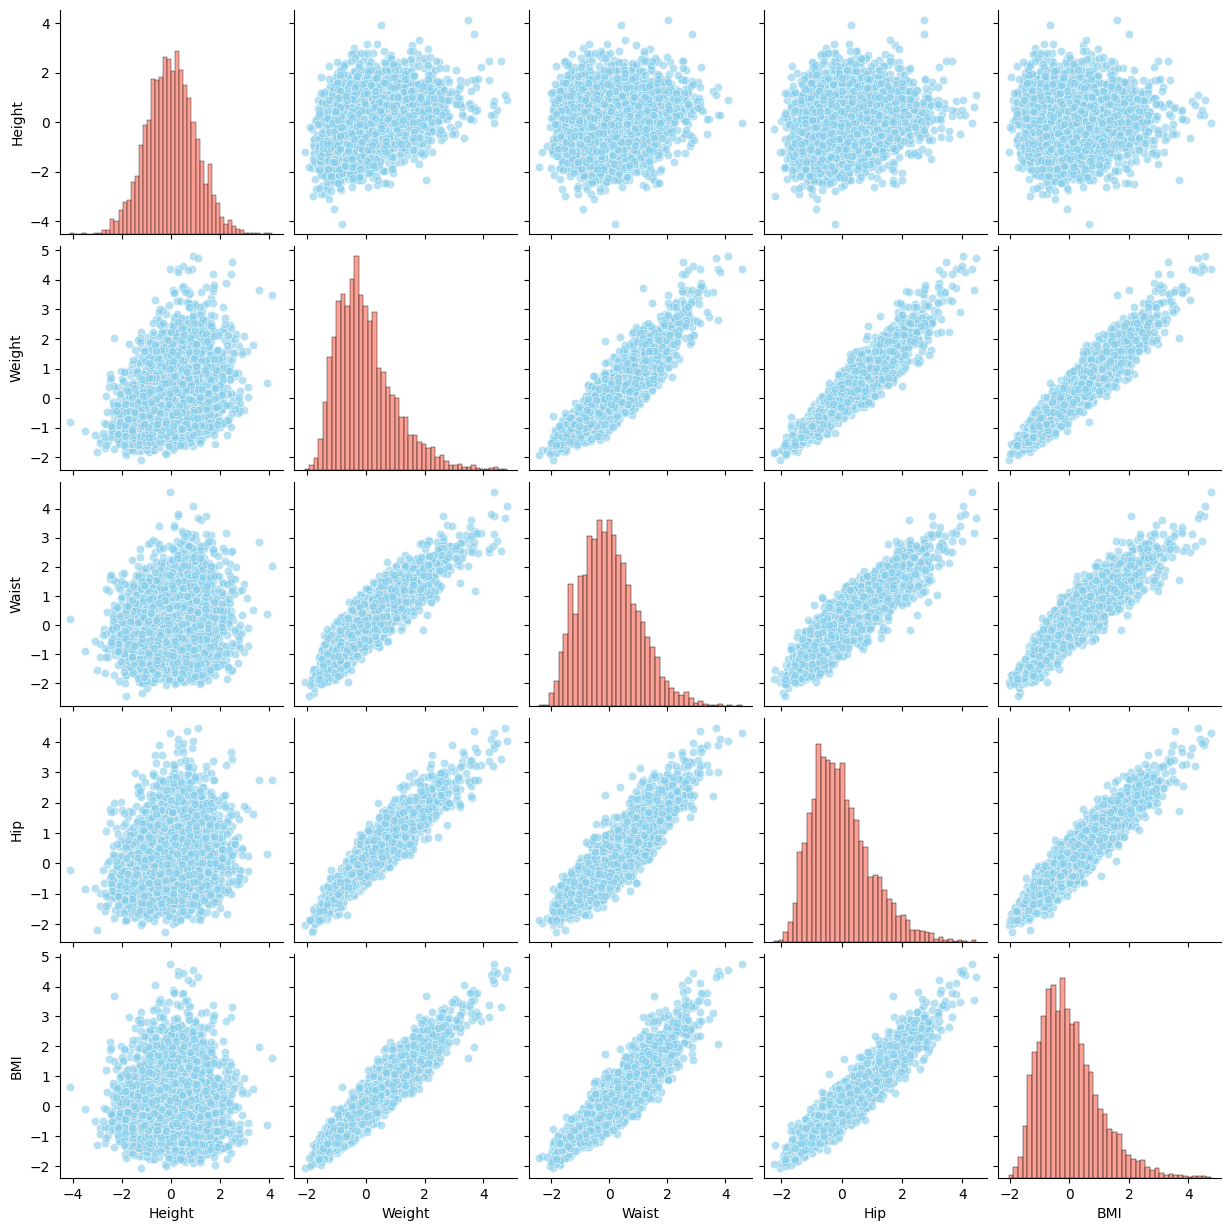

In [37]:
# Select relevant standardized columns
# Column index reference:
# 0 = Weight
# 1 = Height
# 5 = Hip circumference
# 6 = Waist circumference
# 7 = BMI

selected_data = z_female[:, [1, 0, 6, 5, 7]]

# Create DataFrame for better labeling
df_selected = pd.DataFrame(
    selected_data,
    columns=["Height", "Weight", "Waist", "Hip", "BMI"]
)

# Scatterplot matrix
sns.pairplot(df_selected,plot_kws={'color': 'skyblue', 'alpha': 0.6, 'edgecolor': 'white'},
    diag_kws={'color': 'salmon'}
)
plt.show()


## **Correlation Calculation**

Pearson Correlation (Linear relationship)

In [38]:
pearson_corr = df_selected.corr(method="pearson")
print("Pearson Correlation Matrix:\n")
print(pearson_corr)


Pearson Correlation Matrix:

          Height    Weight     Waist       Hip       BMI
Height  1.000000  0.345496  0.126547  0.202895  0.033077
Weight  0.345496  1.000000  0.904550  0.946553  0.945900
Waist   0.126547  0.904550  1.000000  0.897407  0.921198
Hip     0.202895  0.946553  0.897407  1.000000  0.944199
BMI     0.033077  0.945900  0.921198  0.944199  1.000000


Spearman Correlation (Rank-based relationship)

In [39]:
spearman_corr = df_selected.corr(method="spearman")
print("\nSpearman Correlation Matrix:\n")
print(spearman_corr)



Spearman Correlation Matrix:

          Height    Weight     Waist       Hip       BMI
Height  1.000000  0.338860  0.108587  0.205405  0.019897
Weight  0.338860  1.000000  0.900169  0.946634  0.937999
Waist   0.108587  0.900169  1.000000  0.888037  0.923114
Hip     0.205405  0.946634  0.888037  1.000000  0.934196
BMI     0.019897  0.937999  0.923114  0.934196  1.000000


The scatterplot matrix reveals strong positive relationships between weight, waist circumference, hip circumference, and BMI. Height shows a weaker association with BMI compared to weight-related measures. The Pearson and Spearman correlation matrices confirm these findings, indicating strong linear and monotonic relationships among weight-related variables. The similarity between Pearson and Spearman values suggests that the relationships are predominantly linear in nature.

## **Waist-to-Height and Waist-to-Hip Ratios**

In this section, we compute two additional health indicators for both male and female participants:

1. Waist-to-Height Ratio (WHtR)

2. Waist-to-Hip Ratio (WHR)

These ratios provide insight into fat distribution and potential cardiovascular risk.

In [40]:
# --- FEMALE RATIOS ---

female_waist = female_with_bmi[:, 6]
female_height = female_with_bmi[:, 1]
female_hip = female_with_bmi[:, 5]

# Remove missing values safely
valid_female = ~np.isnan(female_waist) & ~np.isnan(female_height) & ~np.isnan(female_hip)
female_clean_ratio = female_with_bmi[valid_female]

female_waist = female_clean_ratio[:, 6]
female_height = female_clean_ratio[:, 1]
female_hip = female_clean_ratio[:, 5]

female_wthr = female_waist / female_height
female_whr = female_waist / female_hip

# Add ratios to female dataset
female_final = np.column_stack((female_clean_ratio, female_wthr, female_whr))


# --- MALE RATIOS ---

male_waist = male_data[:, 6]
male_height = male_data[:, 1]
male_hip = male_data[:, 5]

valid_male = ~np.isnan(male_waist) & ~np.isnan(male_height) & ~np.isnan(male_hip)
male_clean_ratio = male_data[valid_male]

male_waist = male_clean_ratio[:, 6]
male_height = male_clean_ratio[:, 1]
male_hip = male_clean_ratio[:, 5]

male_wthr = male_waist / male_height
male_whr = male_waist / male_hip

# Add ratios to male dataset
male_final = np.column_stack((male_clean_ratio, male_wthr, male_whr))


print("Female dataset shape after adding ratios:", female_final.shape)
print("Male dataset shape after adding ratios:", male_final.shape)


Female dataset shape after adding ratios: (4221, 10)
Male dataset shape after adding ratios: (4081, 9)


Waist-to-height and waist-to-hip ratios were computed for both male and female participants. These ratios provide a more detailed assessment of fat distribution compared to BMI alone. The updated datasets now include these additional indicators, enabling further comparison of central obesity patterns between genders.

Boxplot Comparison of Waist Ratios

In this section, we compare:

1. Female Waist-to-Height Ratio

2. Female Waist-to-Hip Ratio

3. Male Waist-to-Height Ratio

4. Male Waist-to-Hip Ratio

using a box-and-whisker plot. This allows us to observe differences in central obesity patterns between genders.

/tmp/ipython-input-1874054805.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


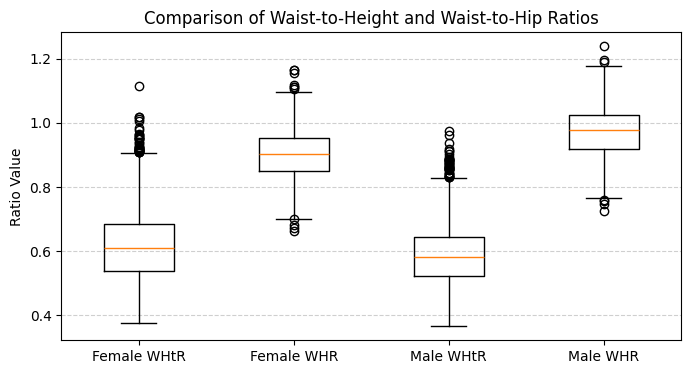

In [43]:
plt.figure(figsize=(8,4))

plt.boxplot(
    [female_wthr, female_whr, male_wthr, male_whr],
    labels=[
        "Female WHtR",
        "Female WHR",
        "Male WHtR",
        "Male WHR"
    ]
)

plt.title("Comparison of Waist-to-Height and Waist-to-Hip Ratios")
plt.ylabel("Ratio Value")
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


The boxplot reveals differences in fat distribution between male and female participants. Males generally exhibit slightly higher waist-to-height and waist-to-hip ratios compared to females, suggesting a greater tendency toward central fat accumulation. The variability within each group indicates that body fat distribution differs across individuals. These ratios provide additional insight beyond BMI by focusing specifically on abdominal fat concentration.

## **Advantages and Limitations of BMI and Waist Ratios**

In this section, we briefly evaluate the strengths and limitations of Body Mass Index (BMI), Waist-to-Height Ratio (WHtR), and Waist-to-Hip Ratio (WHR) as indicators of health risk.

---
**1. Body Mass Index (BMI)**

Advantages :-

Simple and easy to calculate.

Requires only weight and height.

Widely accepted and used in clinical practice.

Useful for large-scale population studies.

Limitations :-

Does not distinguish between muscle and fat mass.

Does not account for fat distribution.

May misclassify athletes or muscular individuals.

Does not directly measure body fat percentage.


---


**2. Waist-to-Height Ratio (WHtR)**

Advantages :-

Accounts for central (abdominal) fat distribution.

Strong predictor of cardiovascular and metabolic risk.

Easy to compute and interpret.

More sensitive to obesity-related health risks than BMI.

Limitations :-

Still does not directly measure total body fat.

Measurement errors in waist circumference can affect accuracy.


---


### **3. Waist-to-Hip Ratio (WHR)**

Advantages :-

Reflects fat distribution pattern.

Useful for identifying abdominal obesity.

Associated with heart disease risk.

Limitations :-

Can vary due to hip structure differences.

Less intuitive to interpret compared to BMI.

May not capture overall body composition effectively.

While BMI provides a general measure of body mass relative to height, waist-based ratios offer better insight into fat distribution and central obesity. Therefore, combining these indicators provides a more comprehensive assessment of health risk.

## **Analysis of Individuals with Lowest and Highest BMI**

In this section, we identify:

The 5 female participants with the lowest BMI

The 5 female participants with the highest BMI

We then examine their standardized body measurements (z-scores) to understand how their characteristics differ from the average participant.

In [42]:
# BMI column index in female_with_bmi
# Original 7 columns + BMI added at index 7

bmi_values = female_with_bmi[:, 7]

# Sort indices based on BMI
sorted_indices = np.argsort(bmi_values)

# Get lowest 5 and highest 5 BMI indices
lowest_5_idx = sorted_indices[:5]
highest_5_idx = sorted_indices[-5:]

print("Standardized measurements of 5 Lowest BMI individuals:\n")
print(z_female[lowest_5_idx])

print("\nStandardized measurements of 5 Highest BMI individuals:\n")
print(z_female[highest_5_idx])


Standardized measurements of 5 Lowest BMI individuals:

[[-2.07978523 -1.22299143 -1.5478402  -1.16905675 -2.1947611  -2.0405496
  -1.94212128 -2.05024028]
 [-1.88017988 -0.18929313 -1.71835247  0.38637892 -2.4443617  -1.85491922
  -2.05708015 -1.99487987]
 [-1.53667299  1.80730222  0.62619127  0.5730312  -2.26607556 -1.6756899
  -1.7064556  -1.97088383]
 [-1.843044   -0.26009438 -0.22637009  0.51081377 -2.30173278 -2.25178417
  -1.85590213 -1.94177591]
 [-1.61094475  0.88688592 -0.09848588  0.47970506 -2.21258971 -1.82931504
  -1.71220354 -1.89319577]]

Standardized measurements of 5 Highest BMI individuals:

[[ 4.2472403   0.29215539  1.86240524 -0.98240447  2.3693641   4.10445598
   3.81731803  4.39649161]
 [ 4.45612963  0.50455915  1.69189297 -1.13794804  3.34993787  3.98283607
   2.90339503  4.46201122]
 [ 4.34936397  0.27799514  2.84285081  1.94181459  4.36616887  3.9188256
   3.75409065  4.51466896]
 [ 4.8042785   0.88688592  2.11817365  1.81737973  3.77782461  4.02124236
   4.0

The standardized measurements reveal clear differences between individuals with low and high BMI values. Participants with the lowest BMI tend to have negative z-scores for weight, waist circumference, and hip circumference, indicating values below the sample average. Conversely, individuals with the highest BMI show strongly positive z-scores for weight, waist, and hip measurements, reflecting substantially above-average body mass and central fat distribution.

This comparison highlights how BMI is closely associated with increased waist and hip circumferences, reinforcing the strong correlations observed earlier in the analysis.

## **Conclusion Section**

This analysis compared anthropometric measurements between male and female participants using statistical summaries, visualization techniques, and derived health indicators. The findings show that males generally exhibit higher average body weight and greater variability. Strong positive relationships were observed between BMI, waist circumference, and hip circumference. Waist-based ratios provided additional insight into fat distribution beyond BMI alone. Overall, combining statistical measures and derived ratios offers a more comprehensive understanding of body composition patterns.